In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
seuil_mouille = 0.01  # Ajustez ce seuil si nécessaire
repertoire = '/work/m24046/m24046mrcr/results_data_30min/'  # Remplacez par votre chemin
fichiers = [f for f in os.listdir(repertoire) if f.endswith('.pkl')]

# Pour une distribution globale
toutes_les_transitions = []

In [24]:
for nom_fichier in fichiers:
    chemin_fichier = os.path.join(repertoire, nom_fichier)
    with open(chemin_fichier, 'rb') as fichier_pickle:
        liste_tuples = pickle.load(fichier_pickle)
    
    nombre_transitions = []
    
    for t in range(len(liste_tuples) - 1):
        x_t, y_t = liste_tuples[t]
        x_t1, y_t1 = liste_tuples[t+1]
        
        h_t = x_t[:,0:1]
        h_t1 = x_t1[:,0:1]
        
        # Déterminer les cellules passant de sec à mouillé
        condition_sec_a_mouille = (h_t <= seuil_mouille) & (h_t1 > seuil_mouille)
        nombre_cellules = np.sum(condition_sec_a_mouille)
        nombre_transitions.append(nombre_cellules)
    
    # Ajouter les transitions à la liste globale
    toutes_les_transitions.extend(nombre_transitions)
    
    # Tracer le graphique pour ce fichier
    #plt.figure()
    #plt.plot(range(len(nombre_transitions)), nombre_transitions, marker='o')
    #plt.title(f"Transitions sec à mouillé dans {nom_fichier}")
    #plt.xlabel("Pas de temps")
    #plt.ylabel("Nombre de cellules")
    #plt.grid(True)
    #plt.show()



In [36]:
toutes_les_transitions = [elmt/(len(h_t1)) for elmt in toutes_les_transitions]

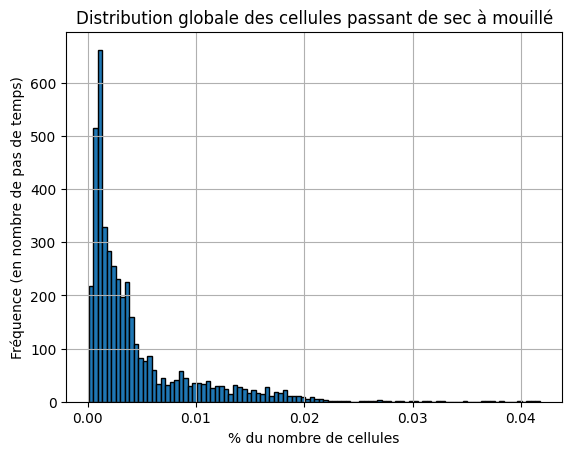

In [37]:
# Tracer la distribution globale
plt.figure()
plt.hist(toutes_les_transitions, bins=100, edgecolor='black')
plt.title("Distribution globale des cellules passant de sec à mouillé")
plt.xlabel("% du nombre de cellules")
plt.ylabel("Fréquence (en nombre de pas de temps)")
plt.grid(True)
plt.show()

In [29]:
seuil_changement=0.01
tous_les_changements = []
for nom_fichier in fichiers:
    chemin_fichier = os.path.join(repertoire, nom_fichier)
    with open(chemin_fichier, 'rb') as fichier_pickle:
        liste_tuples = pickle.load(fichier_pickle)
    
    nombre_changements = []
    
    for t in range(len(liste_tuples) - 1):
        x_t, y_t = liste_tuples[t]
        x_t1, y_t1 = liste_tuples[t+1]
        
        h_t = x_t[:,0:1]
        h_t1 = x_t1[:,0:1]
        
        # Déterminer les cellules passant de sec à mouillé
        condition_changement = np.abs(h_t1-h_t)>seuil_changement
        nombre_cellules = np.sum(condition_changement)
        nombre_changements.append(nombre_cellules)
    
    # Ajouter les transitions à la liste globale
    tous_les_changements.extend(nombre_changements)

In [33]:
tous_les_changements = [elmt/(len(h_t1)) for elmt in tous_les_changements]

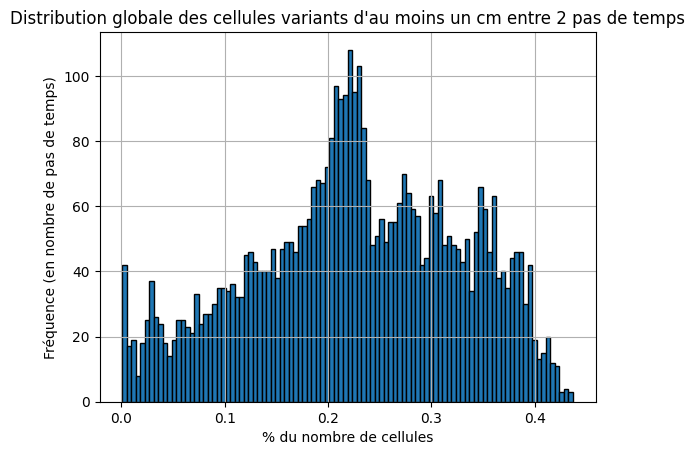

In [35]:
# Tracer la distribution globale
plt.figure()
plt.hist(tous_les_changements, bins=100, edgecolor='black')
plt.title("Distribution globale des cellules variants d'au moins un cm entre 2 pas de temps")
plt.xlabel("% du nombre de cellules")
plt.ylabel("Fréquence (en nombre de pas de temps)")
plt.grid(True)
plt.show()